<a href="https://colab.research.google.com/github/EvangelinaUr/VisuNet/blob/main/Traine_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

4422102/4422102 [==============================] - 0s 0us/step
Epoch 1/2
600/600 [==============================] - 8s 11ms/step - loss: 0.5449 - accuracy: 0.8126
Epoch 2/2
600/600 [==============================] - 6s 9ms/step - loss: 0.3975 - accuracy: 0.8587
313/313 - 1s - loss: 0.4215 - accuracy: 0.8545 - 1s/epoch - 4ms/step

Test accuracy: 0.8544999957084656
2/2 [==============================] - 0s 12ms/step


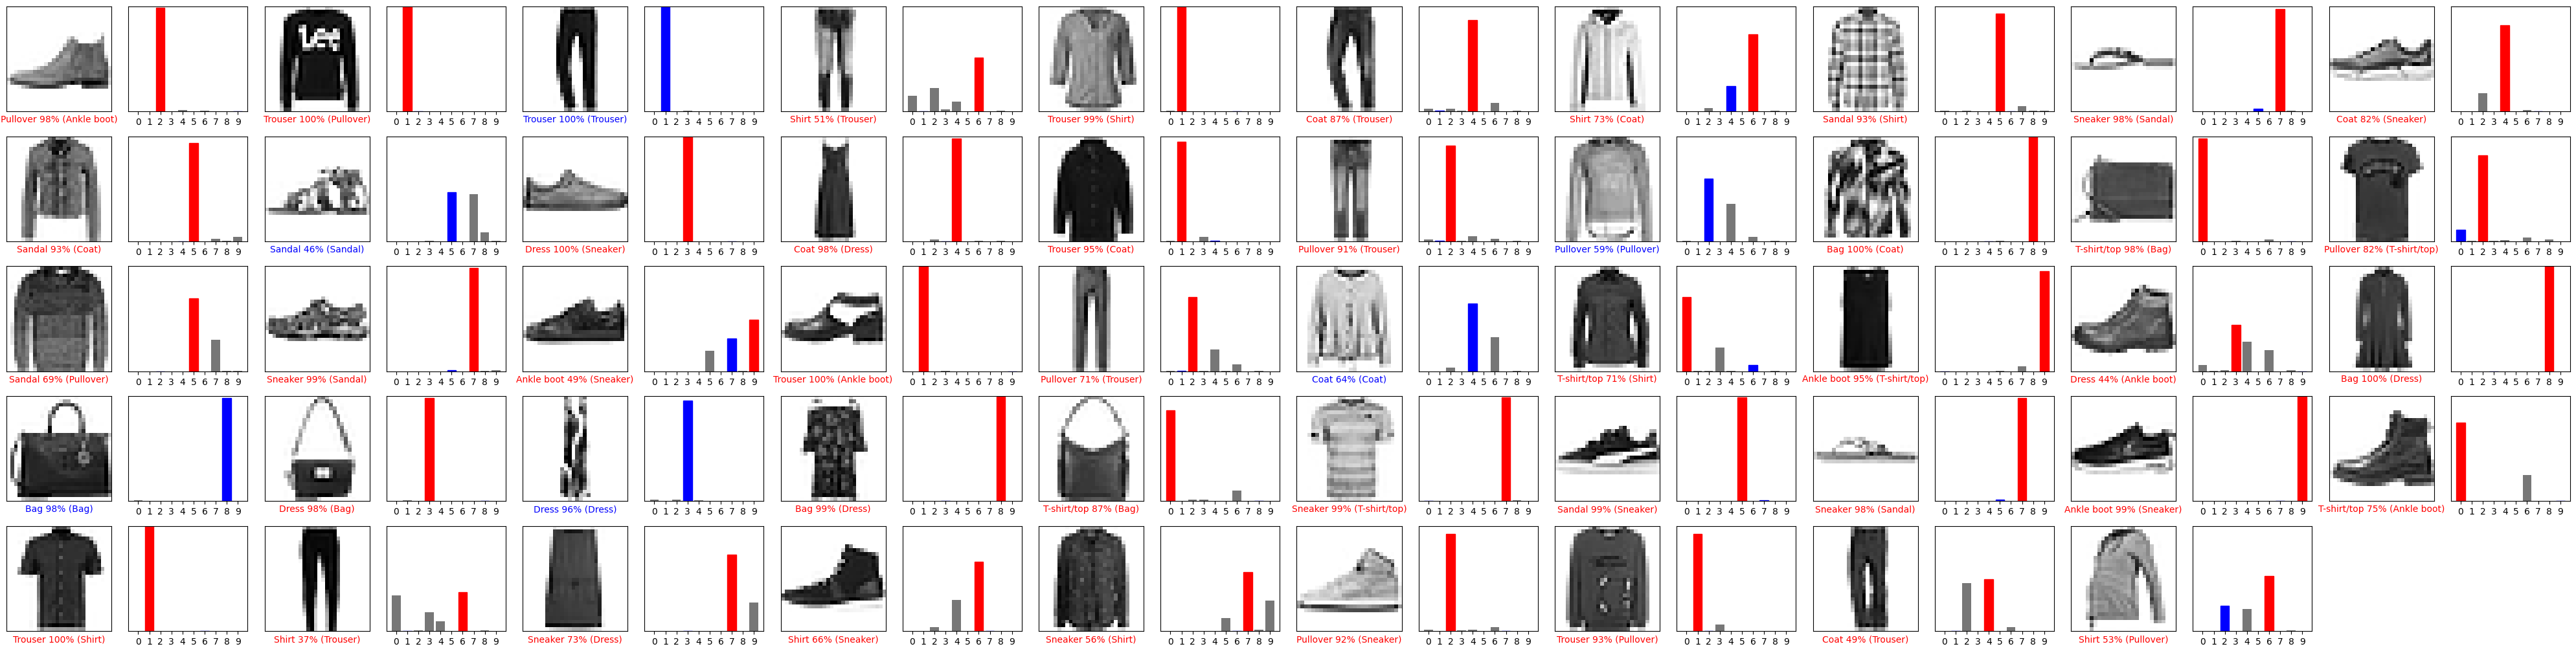

In [1]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

#loading in images
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

#each image has a number label
#0 - tshirt, 1-trosuer, 2-pullover,3-dress,4-coat,5-sandal,6-shirt
#7-sneaker,8-bag,9-ankle boat

#store labels as a list for use later
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


#display image as colour plot
def display_img(index):
    plt.figure()
    plt.imshow(train_images[index])
    plt.colorbar()
    plt.grid(False)
    plt.show()

#greyscale
train_images = train_images / 255.0

test_images = test_images / 255.0

#display multiple images in a grid
def display_images(number):
    plt.figure(figsize=(10,10))
    for i in range(number):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(train_images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[train_labels[i]]) #display label
    plt.show()


#building the model
#flatten - transforms format from 2d array to 1d array

#activation - relu
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])


#compile model
#optimiser - hhow model  is updates based on data and loss function
#loss function - how accurate the model us during train, min this func to steer model in correct direc
#metrics - monitor training and testing, below uses accuracy
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


#training the model
#1-feed training data
#2-model learns to associate images and label
#3-ask model to make preduc
#4 - verify preductions match labels

#1

model.fit(train_images,train_labels,epochs=2,batch_size = 100)

#evaluate accuracy
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

#make predictions
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])

predictions = probability_model.predict(test_images[1:50])

#graph full set of 10 class predictions
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')


num_rows = 10
num_cols = 10
num_images = 49 # num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()




MODEL #2 YULIA&EVANGELINA

In [2]:
!pip install scikit-learn

In [3]:
import cv2

In [4]:
import tensorflow as tf
import keras

In [59]:
# Import necessary libraries
from tensorflow.keras import models, layers
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
import numpy as np
import cv2
from keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical

In [60]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [61]:
# Load the dataset of images and their corresponding descriptions
#train_data = ... # Replace with your own data
#test_data = ... # Replace with your own data
#loading in images

fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [62]:
#each image has a number label
#0 - tshirt, 1-trosuer, 2-pullover,3-dress,4-coat,5-sandal,6-shirt
#7-sneaker,8-bag,9-ankle boat

#store labels as a list for use later
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [63]:
train_images.shape


(60000, 28, 28)

In [32]:
test_images.shape

(10000, 28, 28)

In [33]:
train_labels.shape



(60000,)

In [64]:
# Define the input shape for the model
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
# Create a Sequential model
model = models.Sequential()

# Add layers to the model
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
# Train the model
model.fit(train_images, train_labels, epochs=50, batch_size=32)


Epoch 1/50
1875/1875 [==============================] - 32s 16ms/step - loss: 0.4639 - accuracy: 0.8356
Epoch 2/50
1875/1875 [==============================] - 31s 16ms/step - loss: 0.3152 - accuracy: 0.8881
Epoch 3/50
1875/1875 [==============================] - 30s 16ms/step - loss: 0.2758 - accuracy: 0.8991
Epoch 4/50
1875/1875 [==============================] - 32s 17ms/step - loss: 0.2459 - accuracy: 0.9093
Epoch 5/50
1875/1875 [==============================] - 30s 16ms/step - loss: 0.2255 - accuracy: 0.9170
Epoch 6/50
1875/1875 [==============================] - 29s 16ms/step - loss: 0.2055 - accuracy: 0.9241
Epoch 7/50
1875/1875 [==============================] - 30s 16ms/step - loss: 0.1915 - accuracy: 0.9287
Epoch 8/50
1875/1875 [==============================] - 30s 16ms/step - loss: 0.1769 - accuracy: 0.9338
Epoch 9/50
1875/1875 [==============================] - 30s 16ms/step - loss: 0.1671 - accuracy: 0.9372
Epoch 10/50
1875/1875 [==============================] - 30s 16m

In [66]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(test_images, test_labels)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

# Use the model to predict the label for a new image
def predict_label(img):
    # Preprocess the image
    img = cv2.resize(img, (224, 224))
    img = img / 255.0
  # Reshape the image to match the model's expected input shape
    ##img = np.reshape(img, (1, 224, 224, 1))

    # Predict the label
    pred = model.predict(np.expand_dims(img, axis=0))
    return np.argmax(pred)

# Assuming 'new_image' is a new image in the same format as a training images
#predicted_label = predict_label(test_images[1:50])
print('Predicted label:', predict_label)

313/313 [==============================] - 2s 5ms/step - loss: 0.6309 - accuracy: 0.9110
Test loss: 0.6308774948120117
Test accuracy: 0.9110000133514404
Predicted label: <function predict_label at 0x786d40342b90>


313/313 [==============================] - 3s 8ms/step


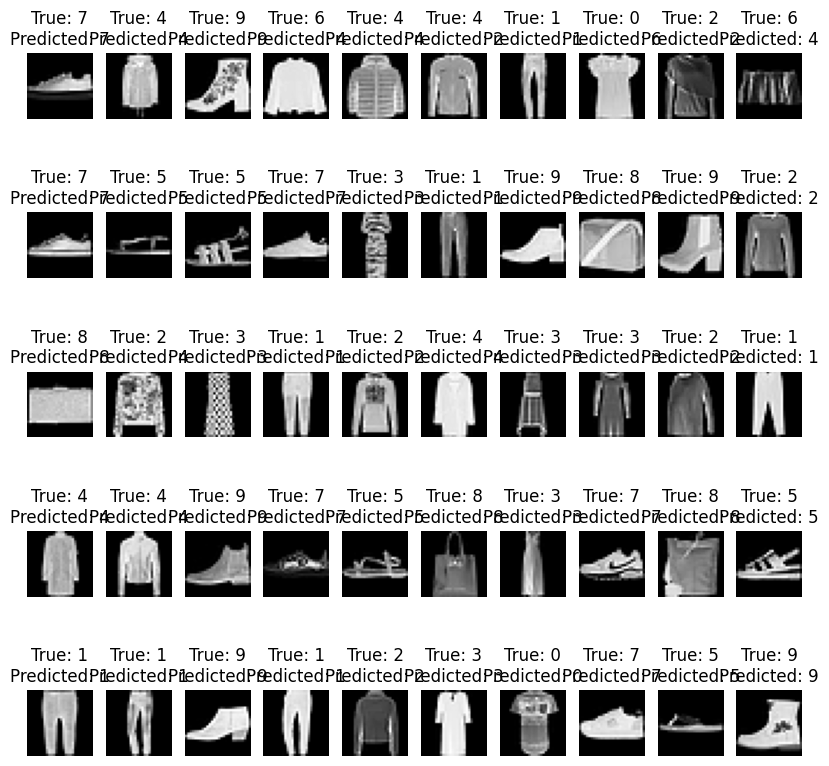

In [65]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming trained model and test_images
# Also, assuming  the predict_label function defined

# Function to display images with their predicted labels
def display_images_with_predictions(images, true_labels, predictions):
    plt.figure(figsize=(10, 10))
    for i in range(min(50, len(images))):  # Display up to 25 images
        plt.subplot(5, 10, i + 1)
        plt.imshow(images[i].reshape(28, 28), cmap='gray')
        plt.title(f'True: {true_labels[i]}\nPredicted: {predictions[i]}')
        plt.axis('off')
    plt.show()

# Make predictions on the test set
predicted_labels = np.argmax(model.predict(test_images), axis=1)

# Display a random sample of predictions
indices = np.random.choice(len(test_images), 50, replace=False)
display_images_with_predictions(test_images[indices], np.argmax(test_labels[indices], axis=1), predicted_labels[indices])
